In [128]:
import numpy as np
import pandas as pd
import os
import ast
import librosa

%matplotlib inline

In [14]:
# Filepaths
data_fn = '2020_with_text.csv'

audiodir = 'data/ispot/2020/audios'
audiofiles = [audiodir + '/' + str(s) for s in os.listdir(audiodir)]

In [3]:
sb_2020 = pd.read_csv(data_fn, index_col=0)
sb_2020.head()

,mp4,Title,Ad ID,Advertiser ID,Subcategory ID,Advertiser,Duration (s),First_DT,Last_DT,Text
0,https://d3npuic909260z.cloudfront.net/002/661/...,"Audi e-tron Super Bowl 2020 TV Commercial, 'Le...",2661330,30464,113,Audi e-tron,60,2020-01-29 00:00:00,2020-05-29 00:00:00,NoAudio
1,https://d3npuic909260z.cloudfront.net/002/661/...,"Tide POWER PODS Super Bowl 2020 TV Commercial,...",2661328,30397,552,Tide POWER PODS,15,2020-02-02 00:00:00,2020-06-02 00:00:00,{'transcript': 'add Sabra to your lineup for a...
2,https://d3npuic909260z.cloudfront.net/002/661/...,"Facebook Groups Super Bowl 2020 TV Commercial,...",2661329,30647,307,Facebook Groups,60,2020-02-01 00:00:00,2020-03-23 00:00:00,{'transcript': 'grabs Cobra for a game-day gam...
3,https://d3npuic909260z.cloudfront.net/002/661/...,2020 Jeep Gladiator Super Bowl 2020 TV Commerc...,2661326,30501,113,Jeep Gladiator,60,2020-02-01 00:00:00,2020-06-02 00:00:00,{'transcript': 'you can score a hundred K on G...
4,https://d3npuic909260z.cloudfront.net/002/661/...,"9-1-1: Lone Star Super Bowl 2020 TV Promo, 'I'...",2661325,31226,287,9-1-1: Lone Star,30,2020-02-01 00:00:00,2020-02-04 00:00:00,{'transcript': 'dip watch and you could win a ...


In [54]:
def feature_extract(mp3_file, n_mfcc=20):
    
    x, sr = librosa.load(mp3_file)
    
    spec_features = [librosa.feature.spectral_centroid, librosa.feature.spectral_bandwidth,
                 librosa.feature.spectral_contrast, librosa.feature.spectral_flatness,
                 librosa.feature.spectral_rolloff]
    
    raw_feats = list()
    # Add spectral features
    for f in spec_features:
        # Get raw features from function call
        raw_feat_f = f(x)
        # Add each feature one-by-one
        for row in raw_feat_f:
            raw_feats.append(row)
            
    print(len(raw_feats))
            
    # MFCCs
    f = librosa.feature.mfcc
    raw_feat = f(x, sr, n_mfcc=n_mfcc)
    for row in raw_feat:
        raw_feats.append(row)
        
    # Zero crossing rate
    f = librosa.feature.zero_crossing_rate
    raw_feat = f(x)
    for row in raw_feat:
        raw_feats.append(row)
        
    # Chromagram    
    f = librosa.feature.chroma_stft
    raw_feat = f(x, sr)
    for row in raw_feat:
        raw_feats.append(row)
    
    # Tonnetz
    f = librosa.feature.tonnetz
    raw_feat = f(x, sr)
    for row in raw_feat:
        raw_feats.append(row)
        
    '''
    f = librosa.feature.fourier_tempogram
    raw_feat = f(x, sr)
    for row in raw_feat:
        raw_feats.append(row)
    '''  
    
    
    
    return raw_feats

In [65]:
sabra = audiofiles[1]
sabra_feats = feature_extract(sabra)
print(len(sabra_feats))

11
31
32
44
50
243


In [64]:
print('Features: ' + str(len(sabra_feats)))
print('Observations Tempo: ' + str(len(sabra_feats[50])))
print('Observations Other: ' + str(len(sabra_feats[0])))

Features: 243
Observations Tempo: 262
Observations Other: 261


In [79]:
transposed = list(map(list, zip(*sabra_feats)))
audio_feats = pd.DataFrame(transposed)
print(audio_feats.shape)

(261, 50)


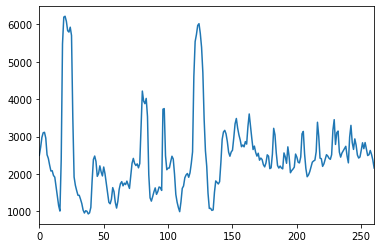

In [78]:
# Spectral Centroid
audio_feats[0].plot()

In [88]:
audio_feats.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,2497.481922,2781.028962,8.680474,15.991126,32.127459,27.603286,29.242361,22.094007,35.023411,0.020924,...,0.719992,1.000000,0.905150,0.470709,0.021442,0.098520,-0.116024,0.004112,0.047262,-0.054636
1,2711.441155,2738.629887,4.710428,9.070290,14.346813,12.572183,16.236548,11.316913,32.762443,0.068085,...,0.719704,0.848229,0.846530,1.000000,-0.019172,0.023479,-0.030395,-0.019359,0.015648,-0.011252
2,2975.942035,2827.754720,9.755600,14.988359,18.173048,13.890180,15.360785,11.841358,32.366368,0.078585,...,1.000000,0.578251,0.575238,0.969157,0.005564,0.013323,0.038776,0.032233,-0.009622,-0.016039
3,3101.122082,2891.108877,21.728312,13.182994,19.919458,14.538382,14.431912,15.128603,31.964689,0.068962,...,1.000000,0.468446,0.345785,0.623879,-0.031293,0.011544,0.006832,-0.005749,-0.008310,-0.019017
4,3112.828923,2856.796699,19.975795,10.099794,21.419003,16.904998,15.852433,13.823919,30.681388,0.081520,...,0.663170,0.437444,0.333388,0.870940,-0.046201,-0.024676,-0.009459,-0.082144,-0.020570,0.023363


In [184]:
feats1d = audio_feats.values.flatten()
len(feats1d)

13050

In [197]:
pd.DataFrame([np.concatenate((np.array([1, 2, 4]), feats1d))])

,0,1,2,3,4,5,6,7,8,9,...,13043,13044,13045,13046,13047,13048,13049,13050,13051,13052
0,1.0,2.0,4.0,2497.481922,2781.028962,8.680474,15.991126,32.127459,27.603286,29.242361,...,0.385684,0.290589,0.32334,0.171085,0.02363,-0.019072,0.11022,-0.03321,0.0477,-0.00207


In [97]:
# 1 as in SB=True
np.insert(feats1d, 0, 1)

array([ 1.00000000e+00,  2.49748192e+03,  2.78102896e+03, ...,
       -3.32103074e-02,  4.77000375e-02, -2.06970423e-03])

In [192]:
# Text length / duration (placeholder for better NLP)

words_per_sec = list()
chars_per_sec = list()
for i in range(len(sb_2020)):
    row = sb_2020.iloc[i]
    if row['Text'] != 'NoAudio':
        s = ast.literal_eval(sb_2020.iloc[1]['Text'])['transcript']
        dur = row['Duration (s)']
        wordrate = len(s.split()) / dur
        charrate = len(s) / dur
        words_per_sec.append(wordrate)
        chars_per_sec.append(charrate)
    else:
        words_per_sec.append(-1)
        chars_per_sec.append(-1)

In [162]:
mar_tests = pd.DataFrame({'Duration': sb_2020['Duration (s)'], 'WordRate': words_per_sec, 'CharRate': chars_per_sec})

In [164]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=-1, strategy='mean')

mar_tests = pd.DataFrame(imp.fit_transform(mar_tests.values))

In [165]:
sb_2020['WordsPerSec'] = mar_tests[1]
sb_2020['CharsPerSec'] = mar_tests[2]

In [182]:
audio_path = 'data/ispot/2020/audios'
a = str(sb_2020.iloc[175]['Ad ID']) + '.mp3'
audiofile = os.path.join(audio_path, a)
trans = list()
# convert mp3 file to wav                                                       
sound = AudioSegment.from_mp3(audiofile)
sound.export("transcript.wav", format="wav")

# transcribe audio file                                                         
AUDIO_FILE = "transcript.wav"

# use the audio file as the audio source                                        
r = sr.Recognizer()
with sr.AudioFile(AUDIO_FILE) as source:
        audio = r.record(source)  # read the entire audio file      
        tries = r.recognize_google(audio, show_all=True)
        if len(tries) == 0:
            transcript = 'NoAudio'
        else:
            transcript = tries['alternative'][0]
        trans.append(transcript)

In [183]:
trans

[{'transcript': 'all right here we go Big Papi so happy to see you know I love your accent but for this commercial we got a really Boston it up right I mean you got the clutch back. Okay so you ready',
  'confidence': 0.93987775}]

In [173]:
import os
from moviepy.editor import *
import pandas as pd
import numpy as np
import speech_recognition as sr
from os import path
from pydub import AudioSegment

In [174]:
trans

[{'transcript': 'all right here we go Big Papi so happy to see you know I love your accent but for this commercial we got a really Boston it up right I mean you got the clutch back. Okay so you ready',
  'confidence': 0.93987727}]